In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import power_transform
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection  import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [147]:
df = pd.read_csv("C:\\Users\\chawl\\Documents\\Abalone.csv")

In [148]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# EDA

In [149]:
df.shape

(4177, 9)

We have 4177 rows and 9 columns in our dataset

In [150]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In the data set th Sex attribute is of type Object and Rings atribute is of type int rest are of float type

In [151]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

We don't have any null values in  our dataset

In [152]:
duplicate = df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


We don't have any duplicate data in our dataset

In [153]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In Sex attribute we have 3 categories -> [M,I,F]

In [154]:
df.describe(include='all')

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000


From above we can see the Mean/ Standard Deviation and other information for all the attributes

<AxesSubplot:xlabel='Rings', ylabel='count'>

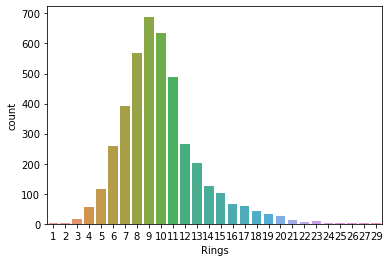

In [155]:
sns.countplot(x='Rings',data=df)

We can see tha counts of differnet Rings from above plot. IN our Rings attribute we have most of the data as 9 rings

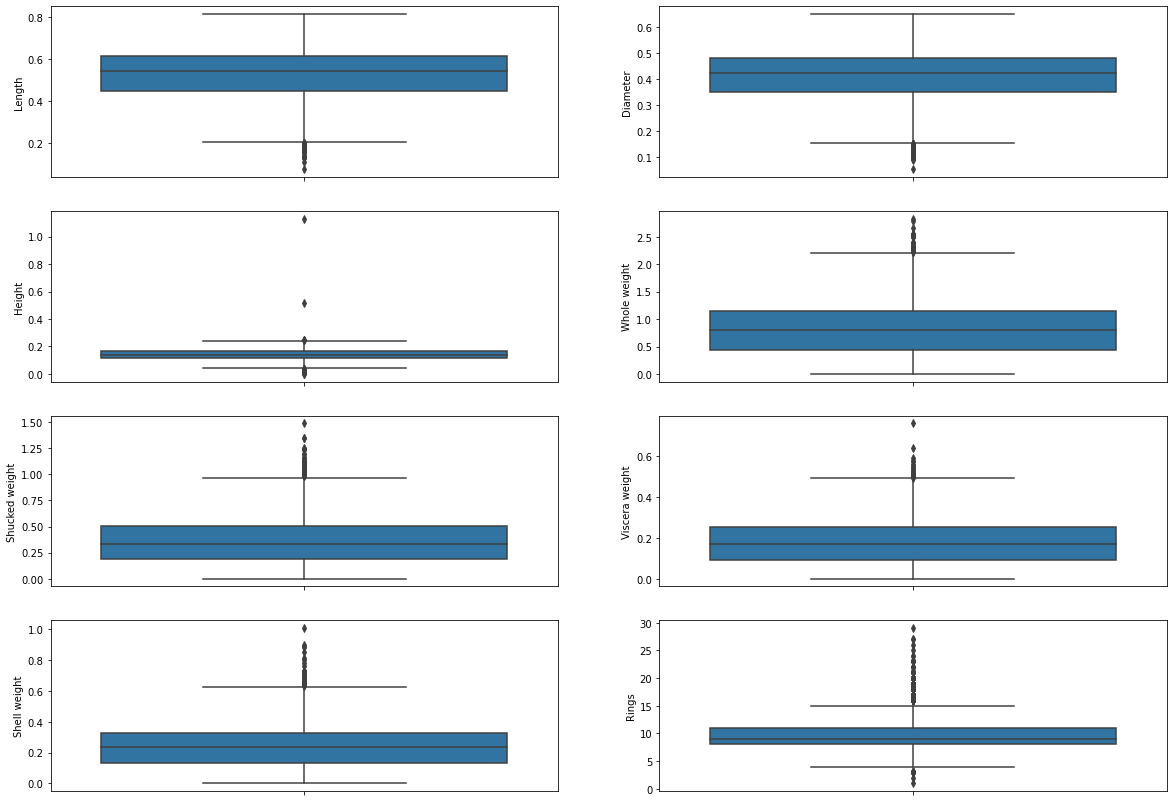

In [156]:

counter=1
plt.figure(figsize=(20,150))
columns = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings']
counter=1;
for i in range(0,len(columns)):
        plt.subplot(40,2,counter)
        counter=counter+1
        sns.boxplot(y=columns[i],hue = columns[i],data=df)
        #sns.boxplot(df[columns[i]])

From above we can see that in attributes 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings' outliers are present

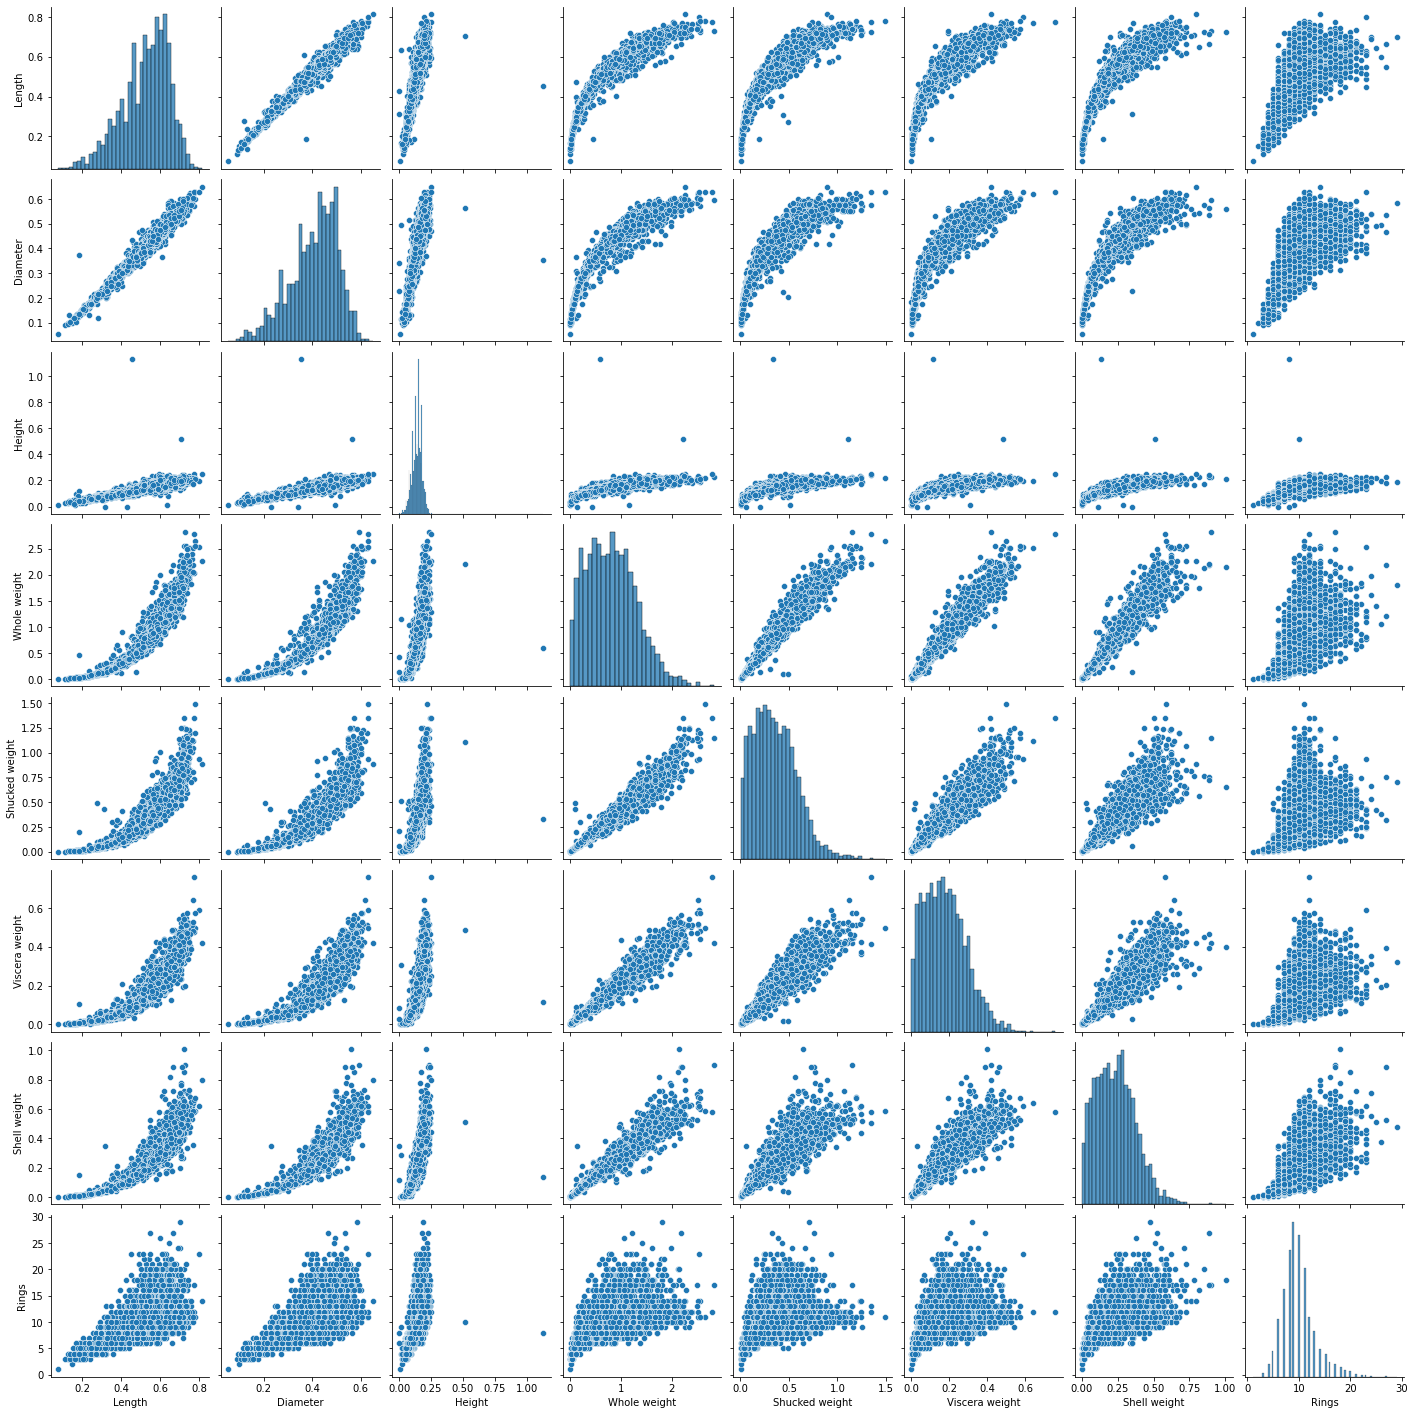

In [157]:
sns.pairplot(data=df)

From above we can conclude that:

    'Length' - have linear relationship with Diameter
    'Diameter' - have linear relationship with Diameter
    'Whole weight' - have linear relationship with Shell weight,Viscera weight,Shucked weight
    'Shucked weight' - have linear relationship with Whole Weight
    'Viscera weight' - have linear relationship with Whole Weight
    'Shell weight' - have linear relationship with Whole Weight
    Whole Weight = shucked weight+ Viscera weight + shell weight

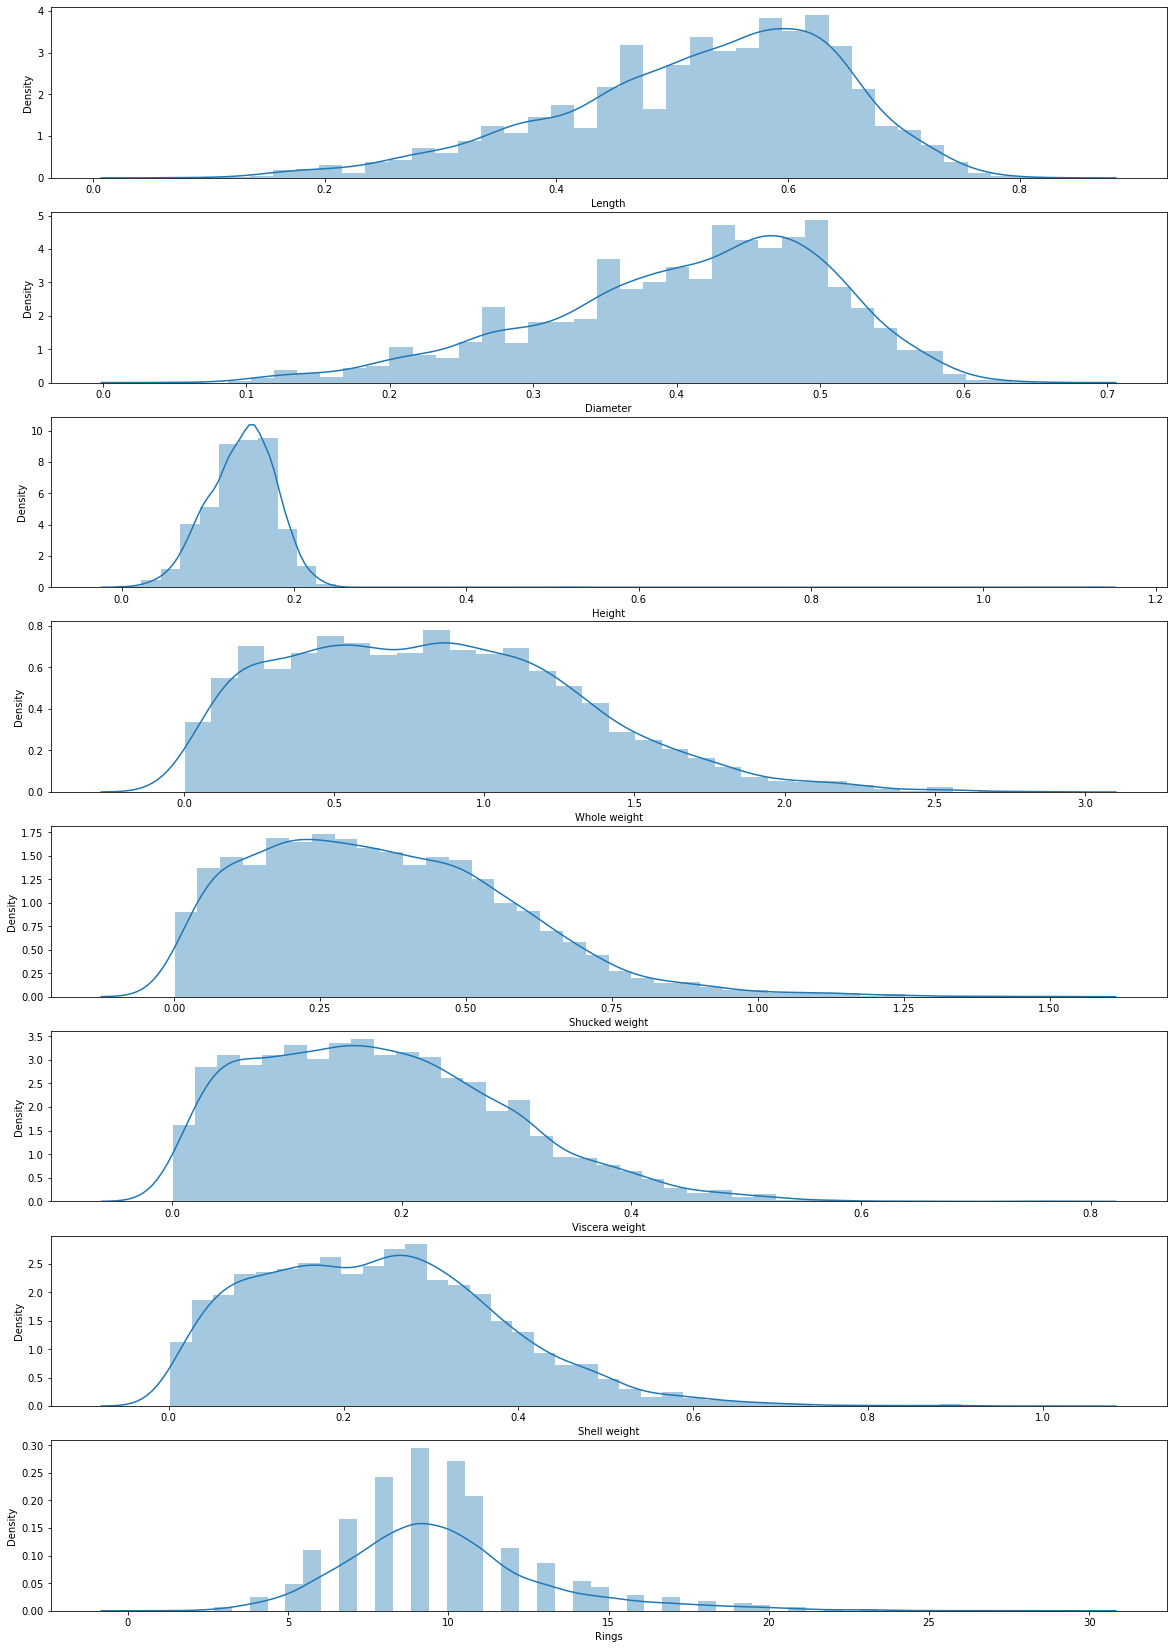

In [158]:

counter=1
plt.figure(figsize=(20,150))
columns = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings']
counter=1;
for i in range(0,len(columns)):
        plt.subplot(40,1,counter)
        counter=counter+1
        sns.distplot(df[columns[i]])

data is normally distributed in all the columns

In [159]:
df.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

Length, Diameter are left skewed whereas Height, Whole Weight, Shucked Weight, Viscera Weight, Shell Weight and Rings are right skewed

<AxesSubplot:>

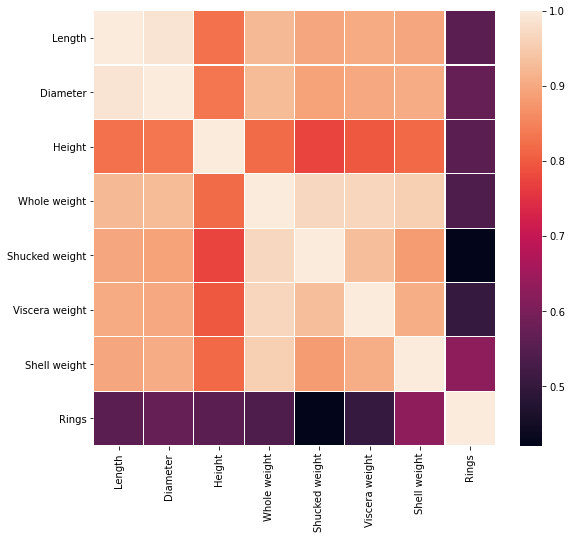

In [160]:
corrmat = df.corr()
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, linewidths = 0.1)

    We can conclude that shell weight. Viscera Weight, Shucked weight are highly correlated to Whole Weight
    We can conclude that Diameter is correlated to Length 
    Other attributes have low correlation with each other

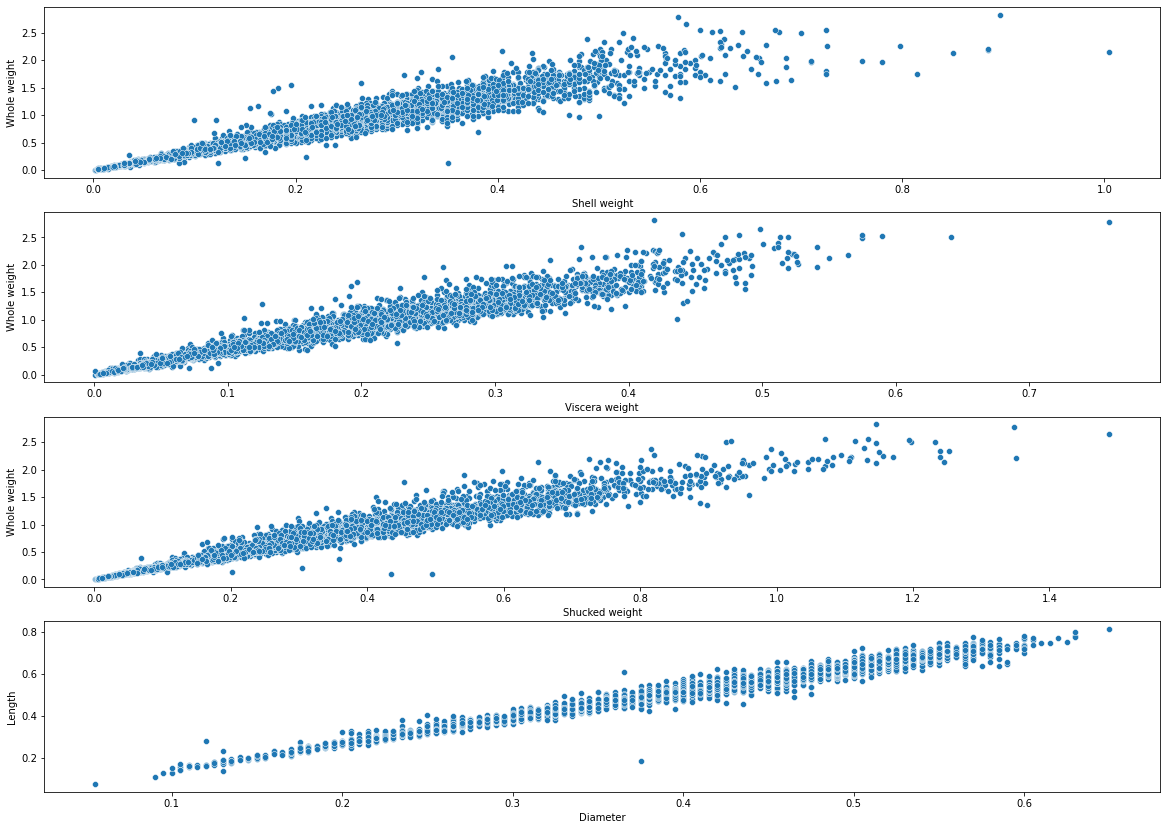

In [161]:
cols1=['Shell weight','Viscera weight','Shucked weight','Diameter']
cols2=['Whole weight','Whole weight','Whole weight','Length']
counter=1
plt.figure(figsize=(20,150))
for i in range(0,len(cols1)):
        plt.subplot(40,1,counter)
        counter=counter+1
        sns.scatterplot(x=cols1[i],y=cols2[i],data=df)

    With increase in Diameter size Length is also increasing
    With increase in shell weight or Viscera Weight or Shucked weight values Whole Weight value is also increasing

# Removing Outliers

In [162]:
columns =  ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings']
for col in columns:
    IQR = df[col].quantile(0.75)-df[col].quantile(0.25)
    Barmax =  df[col].quantile(0.75) + 1.5*IQR
    Barmin =  df[col].quantile(0.25) - 1.5*IQR
    df.loc[df[col]>Barmax,col] = Barmax
    df.loc[df[col]<Barmin,col] = Barmin

# Confirming Removal of Outliers

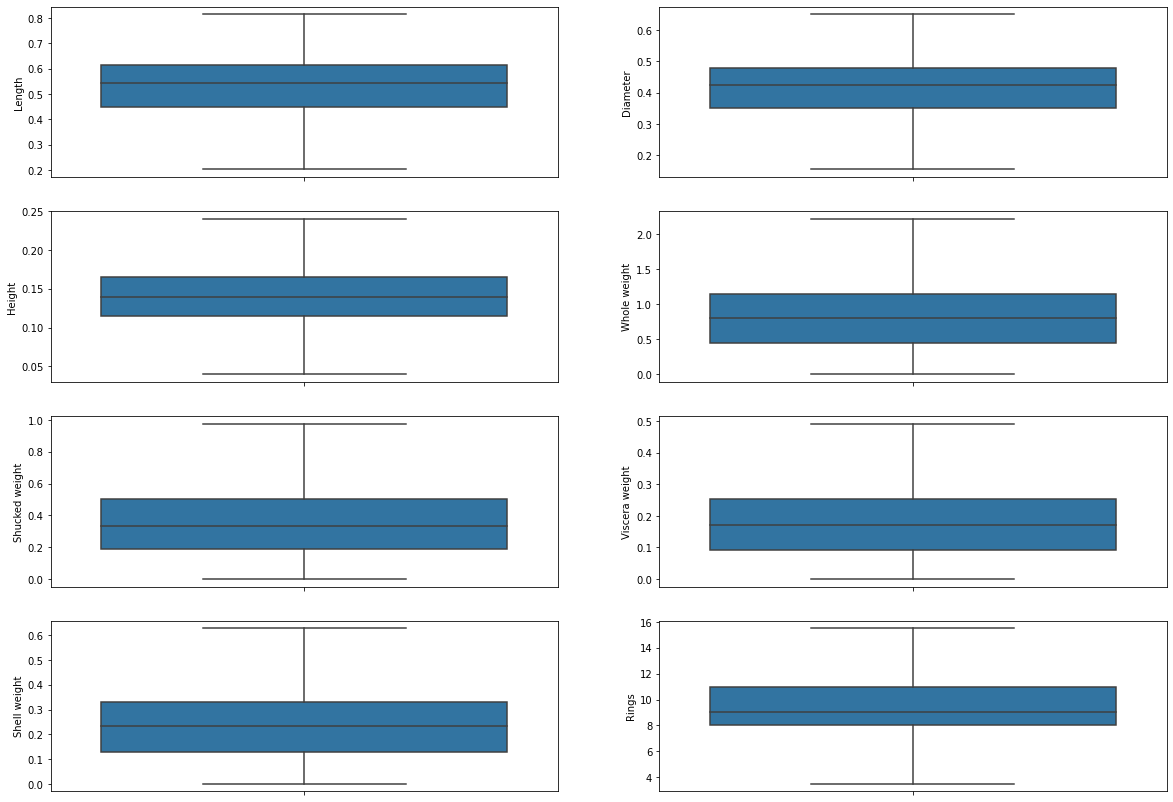

In [163]:

counter=1
plt.figure(figsize=(20,150))
columns = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings']
counter=1;
for i in range(0,len(columns)):
        plt.subplot(40,2,counter)
        counter=counter+1
        sns.boxplot(y=columns[i],hue = columns[i],data=df)
        #sns.boxplot(df[columns[i]])

    Outliers in all the attributes are succesfully removed

# Scaling the data

In [164]:
fin_df  = df.drop(["Sex",'Rings'],axis=1) #dropping the object type variables/ target variable
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(fin_df)
final_df = pd.DataFrame(minmax_df, columns = fin_df.columns)

# Removing Skewness

In [165]:
fin_df_new=power_transform(final_df)
fin_df_new = pd.DataFrame(fin_df_new,columns=final_df.columns)

# confirming removal of skewness

In [166]:
fin_df_new.skew()

Length           -0.083544
Diameter         -0.086452
Height           -0.026802
Whole weight      0.016510
Shucked weight    0.024914
Viscera weight    0.023818
Shell weight      0.013179
dtype: float64

    Skewness of the variable is within the range of -0.5 to +0.5

# Labeling the data

In [167]:
final_df = final_df.join(df['Sex'])

In [168]:
final_df = final_df.join(df['Rings'])

In [169]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
final_df['Sex'] =  LE.fit_transform(final_df['Sex'])

In [170]:
final_df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex,Rings
0,0.412245,0.424242,0.275,0.230813,0.229231,0.204372,0.237220,2,15.0
1,0.240816,0.222222,0.250,0.100755,0.101026,0.097611,0.109425,2,7.0
2,0.534694,0.535354,0.475,0.304294,0.262051,0.286731,0.333067,0,9.0
3,0.387755,0.424242,0.425,0.231714,0.220000,0.230808,0.245208,2,10.0
4,0.208163,0.202020,0.200,0.091514,0.090769,0.079309,0.085463,1,7.0
...,...,...,...,...,...,...,...,...,...
4172,0.591837,0.595960,0.625,0.398963,0.378462,0.485003,0.395367,0,11.0
4173,0.632653,0.575758,0.475,0.434577,0.449231,0.435180,0.413738,2,10.0
4174,0.648980,0.646465,0.825,0.529246,0.537949,0.583630,0.489617,2,9.0
4175,0.689796,0.666667,0.550,0.492505,0.543590,0.529741,0.470447,0,10.0


    Sex attibute data has been labeled as 0,1,2 successfully

# Train Test Split

In [171]:
x = final_df.drop(['Rings'],axis=1)
y = final_df["Rings"]

In [172]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
maxAccu=0
maxRS=0
for i in range(200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    regr = LinearRegression()
    regr.fit(x_train, y_train)
    pred=regr.predict(x_test)
    acc = r2_score(y_test, pred)
    if(acc>maxAccu):
        maxAccu=acc
        maxRS=i
print("Best R2 Score is",maxAccu,"on Random State",maxRS)

Best R2 Score is 0.5929055120067248 on Random State 159


In [173]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=159)

# Model Building

Linear regression

In [175]:
regr = LinearRegression()
regr.fit(x_train, y_train)
pred=regr.predict(x_test)
print(r2_score(y_test, pred))

0.5929055120067248


    R2 Score for Linear Regression is 0.592

Ridge Model

In [176]:
rr = Ridge(alpha=0.01)
rr.fit(x_train, y_train) 
predict= rr.predict(x_train)
print(r2_score(y_train, predict))


0.54739727669145


    R2 Score for Ridge Model is 0.547

Lasso Model

In [179]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x_train, y_train) 
pred_train_lasso= model_lasso.predict(x_train)
print(r2_score(y_train, pred_train_lasso))

0.5316183507287695


    R2 Score for Lasso Model is 0.531

Elastic Net Model

In [181]:
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(x_train, y_train) 
pred_train_enet= model_enet.predict(x_train)
print(r2_score(y_train, pred_train_enet))

0.49478221025879465


    R2 Score for Elastic Net Model is 0.494

# Cross Validation

In [182]:
print(cross_val_score(regr,x,y,scoring='r2',cv=5).mean())

0.4645505734586098


    Cross Validation Score for Linear regression Model is 0.464

In [183]:
print(cross_val_score(rr,x,y,scoring='r2',cv=5).mean())

0.4645839964717867


    Cross Validation Score for Ridge Model is 0.464

In [127]:
print(cross_val_score(model_lasso,x,y,scoring='r2',cv=5).mean())

0.4442096018828794


    Cross Validation Score for Lasso model is 0.444

In [128]:
print(cross_val_score(model_enet,x,y,scoring='r2',cv=5).mean())

0.3963048557514762


    Cross Validation Score for Elastic Model is 0.396

    linear regrresion  = 0.59 - 0.46 = 0.13
    ridge = 0.54 - 0.46 = 0.8
    lasso = 0.53 - 0.44 = 0.9
    ElasticNet = 0.49 - 0.39 = 0.13
    Model suited for tuning is ridge model

# Hyper Parameter tuning for ridge

In [185]:
space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]

In [186]:
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(rr, space)

In [187]:
result = search.fit(x,y)

In [188]:
result.best_params_

{'alpha': 0.1, 'fit_intercept': True, 'normalize': False, 'solver': 'svd'}

Best parameter for model building: {'alpha': 0.1, 'fit_intercept': True, 'normalize': False, 'solver': 'svd'}

# Building final model

In [190]:
rr = Ridge(alpha= 0.1, fit_intercept= True, normalize= False, solver= 'sag')
rr.fit(x_train, y_train) 
predict= rr.predict(x_train)
print(r2_score(y_train, predict))


0.54731164091777


# Saving the model

In [191]:
import joblib
joblib.dump(rr,"Abalone.pkl")


['Abalone.pkl']